In [1]:
# Imports
# You will probably need to install Tensorflow & Keras
# Note: TensorFlow & Numpy often have version mismatches & 
#       you may need to roll back your Numpy version
import sys
#!{sys.executable} -m pip install scikit-image
import sklearn
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import os
import scipy.io as scipy
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from skimage.transform import resize

2024-03-11 17:21:07.256395: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 17:21:07.298012: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 17:21:07.298056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 17:21:07.299226: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-11 17:21:07.305938: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 17:21:07.306628: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [15]:
def load_images_from_folder(root_folder, target_size=(32,32)):
    images = []
    labels = []
    
    for class_folder in os.listdir(root_folder):
        class_folder_path = os.path.join(root_folder, class_folder)
        if os.path.isdir(class_folder_path):
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                try:
                    img = mpimg.imread(image_path)
                    img = resize(img, target_size)
                    #plt.imshow(img, cmap='gray')
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(class_folder)  # Use folder name as label
                except Exception as e:
                    print(f"Error loading image {image_path}: {str(e)}")

    return np.array(images), np.array(labels)
    
data = load_images_from_folder("data", (64,64))

Error loading image data/apple/.ipynb_checkpoints: [Errno 21] Is a directory: 'data/apple/.ipynb_checkpoints'
Error loading image data/banana/.ipynb_checkpoints: [Errno 21] Is a directory: 'data/banana/.ipynb_checkpoints'


In [22]:
def shuffle_data(data):
    images, labels = data
    
    indices = np.random.permutation(len(images))
    images = images[indices]
    labels = labels[indices]
    
    return images, labels

def classify_labels(labels):
    new_labels = []
    # Initialize an empty dictionary
    object_dict = {}
    
    # Open the file and read its contents
    with open("map_id_label.txt", "r") as file:
        # Iterate over each line in the file
        for line in file:
            # Split the line based on the comma delimiter
            parts = line.strip().split(",")
            # Extract the key and value from the split parts
            value = int(parts[0])  # Convert the key to integer
            key = parts[1]
            # Add the key-value pair to the dictionary
            object_dict[key] = int(value)

    for i, c in enumerate(labels):
        if c in object_dict:
            new_labels.append(object_dict[c])
    
    return np.array(new_labels)

images, labels = shuffle_data(data)
labels = classify_labels(labels)
labels

array([ 5,  5, 11, 11,  5, 11,  5,  5,  5, 11,  5,  5,  5, 11,  5, 11,  5,
        5, 11, 11,  5,  5,  5,  5, 11, 11,  5,  5,  5, 11,  5, 11, 11, 11,
       11, 11, 11, 11,  5,  5,  5, 11,  5,  5,  5,  5, 11, 11, 11,  5, 11,
       11,  5, 11, 11, 11,  5, 11, 11,  5, 11, 11, 11, 11, 11, 11,  5, 11,
        5, 11,  5, 11, 11,  5, 11,  5, 11,  5,  5, 11,  5, 11, 11, 11, 11,
        5, 11,  5,  5, 11, 11,  5, 11,  5, 11,  5, 11,  5,  5, 11, 11, 11,
        5,  5, 11,  5, 11, 11, 11,  5,  5,  5, 11, 11, 11, 11,  5, 11,  5,
       11, 11, 11,  5,  5,  5, 11,  5, 11,  5,  5,  5,  5, 11,  5,  5,  5,
       11, 11,  5,  5, 11,  5, 11, 11,  5,  5,  5,  5,  5, 11,  5,  5,  5,
       11,  5, 11,  5, 11, 11])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, train_size=0.80, random_state = 42)

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(20))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))


Epoch 1/20
4/4 [==============================] - 2s 283ms/step - loss: 2.0578 - accuracy: 0.3701 - val_loss: 0.7812 - val_accuracy: 0.5312
Epoch 2/20
4/4 [==============================] - 1s 208ms/step - loss: 0.8355 - accuracy: 0.4646 - val_loss: 0.7520 - val_accuracy: 0.5312
Epoch 3/20
4/4 [==============================] - 1s 200ms/step - loss: 0.7663 - accuracy: 0.4567 - val_loss: 0.6985 - val_accuracy: 0.4688
Epoch 4/20
4/4 [==============================] - 1s 184ms/step - loss: 0.7180 - accuracy: 0.4724 - val_loss: 0.7288 - val_accuracy: 0.4688
Epoch 5/20
4/4 [==============================] - 1s 156ms/step - loss: 0.7135 - accuracy: 0.5118 - val_loss: 0.7399 - val_accuracy: 0.5312
Epoch 6/20
4/4 [==============================] - 1s 183ms/step - loss: 0.7166 - accuracy: 0.5354 - val_loss: 0.7344 - val_accuracy: 0.4688
Epoch 7/20
4/4 [==============================] - 1s 160ms/step - loss: 0.7118 - accuracy: 0.5039 - val_loss: 0.6893 - val_accuracy: 0.5312
Epoch 8/20
4/4 [====

1/1 - 0s - loss: 0.3763 - accuracy: 0.9688 - 54ms/epoch - 54ms/step
0.96875


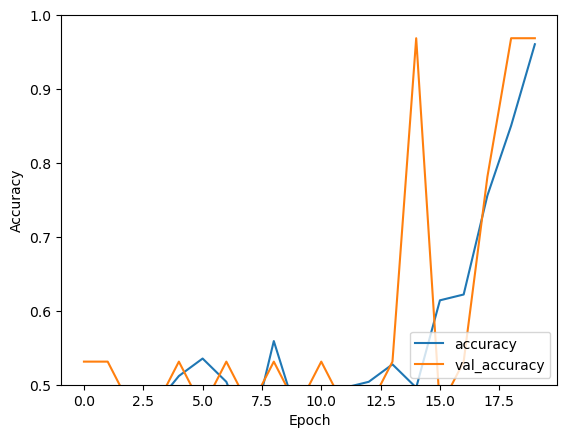

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)